In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data=load_iris()
x=data.data[:,:2]
y=data.target
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
svm_model=SVC(kernel='poly')
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy of svm with polynomial kernal:{accuracy:.2f}')

Accuracy of svm with polynomial kernal:0.83


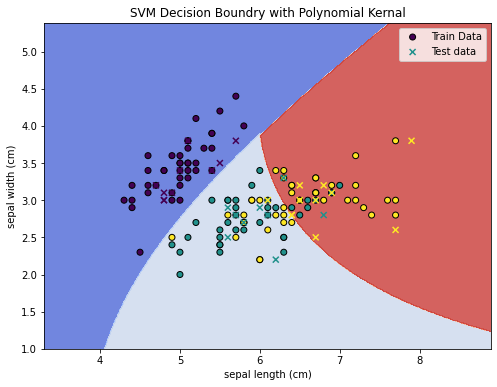

In [2]:
x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
y_min,y_max=x[:,1].min()-1,x[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
z=svm_model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx,yy,z,alpha=0.8,cmap="coolwarm")
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolors='k',marker='o',label='Train Data')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x',label='Test data')
plt.title('SVM Decision Boundry with Polynomial Kernal')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.show()